# Business Problem
The flight ticket price in India is based on demand and supply model with few restrictions on pricing from regulatory bodies. It is often perceived as unpredictable and , recent dynamic pricing scheme added to the confusion. The objective is to create a machine learning model for predicting the flight price, based on historical data, which can be used for reference price for customers as well as airline service providers

# Goal
Creating a machine learning for predicting flight ticket price with high accuracy.

# Overview
1) Understand the shape of the data (Histograms, box plots, etc.)

2) Data Cleaning

3) Data Exploration

4) Feature Engineering

5) Data Preprocessing for Model

6) Basic Model Building

7) Model Tuning

8) Ensemble Modle Building

9) Testing

10) Results

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
#displaying the max columns
pd.set_option('display.max_columns',None)
df_train=pd.read_excel("flight_train.xlsx")
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
df_train.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
Airline            10683 non-null object
Date_of_Journey    10683 non-null object
Source             10683 non-null object
Destination        10683 non-null object
Route              10682 non-null object
Dep_Time           10683 non-null object
Arrival_Time       10683 non-null object
Duration           10683 non-null object
Total_Stops        10682 non-null object
Additional_Info    10683 non-null object
Price              10683 non-null int64
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


# Exploratory data analysis

## Let's explore the data
**As you can see in the info that all the columns in the dataframe except for the price are in string format 
so we need to convert our required column in to the appropriate one.

In [5]:
#clear the missing data
df_train.dropna(inplace=True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
Airline            10682 non-null object
Date_of_Journey    10682 non-null object
Source             10682 non-null object
Destination        10682 non-null object
Route              10682 non-null object
Dep_Time           10682 non-null object
Arrival_Time       10682 non-null object
Duration           10682 non-null object
Total_Stops        10682 non-null object
Additional_Info    10682 non-null object
Price              10682 non-null int64
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


In [6]:
df_train.shape

(10682, 11)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

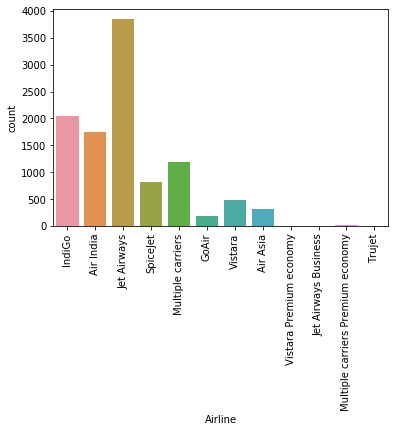

In [7]:
# lets check the count of the Airline in the visual graph
plot=plt.figure()
sns.countplot('Airline',data=df_train)
plt.xticks(rotation=90)

In [8]:
df_train['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [9]:
#df_train.loc[df_train.Airline=='Trujet']

### Converting sparse(infrequent) classes of Airline into one category

In [9]:
df_train['Airline'].replace(['Vistara Premium economy','Trujet'],'Another',inplace=True)

In [10]:
df_train['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Another                                 4
Name: Airline, dtype: int64

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

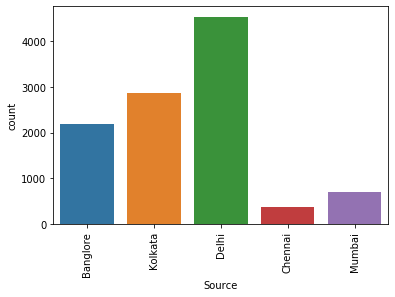

In [11]:
# lets check the count of the Source in the visual graph
plot=plt.figure()
sns.countplot('Source',data=df_train)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

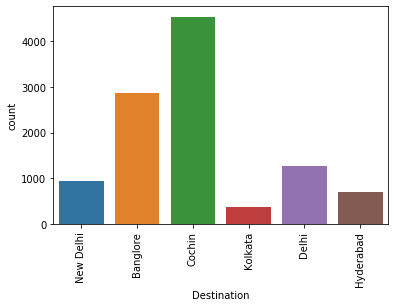

In [12]:
#Now lets check the count of the Destination in the visual graph
plot=plt.figure()
sns.countplot('Destination',data=df_train)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

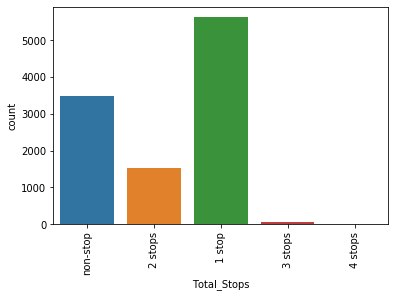

In [13]:
#Now lets check the count of the Total_Stops in the visual graph
plot=plt.figure()
sns.countplot('Total_Stops',data=df_train)
plt.xticks(rotation=90)

In [14]:
df_train['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
2 Long layover                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

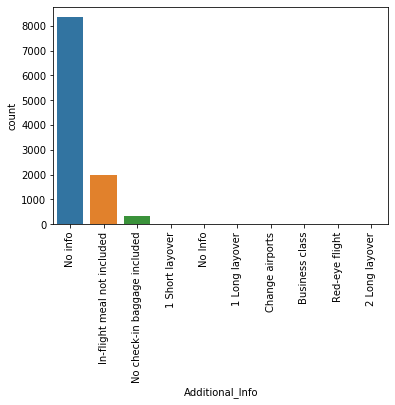

In [15]:
#Now lets check the count of the Additional_info in the visual graph
plot=plt.figure()
sns.countplot('Additional_Info',data=df_train)
plt.xticks(rotation=90)

In [16]:
df_train.describe()

,Price
count,10682.000000
mean,9087.214567
std,4611.548810
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


#### Maximum price is 79512 Rs. & minimum price is 1759 Rs.

In [17]:
df_train.describe(include = ['O'])

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10682,10682,10682,10682,10682,10682,10682,10682,10682,10682
unique,11,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4536,4536,2376,233,423,550,5625,8344


Text(0, 0.5, 'Price of ticket')

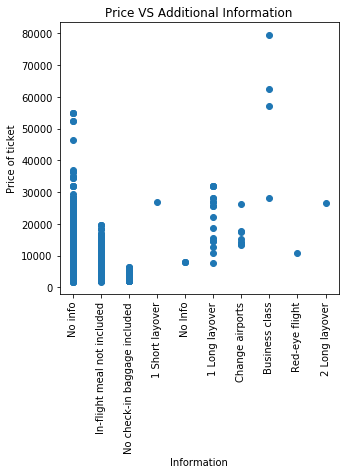

In [20]:
plt.figure(figsize = (5,5))
plt.title('Price VS Additional Information')
plt.scatter(df_train['Additional_Info'], df_train['Price'])
plt.xticks(rotation = 90)
plt.xlabel('Information')
plt.ylabel('Price of ticket')

#### From above scatter plot it is clear that the ticket prices for Business class is higher which is quite obivious.

In [21]:
df_train['Date_of_Journey']=pd.to_datetime(df_train['Date_of_Journey'])

In [22]:
##extracting the day of journey and month of journey from the Date of journey column
#as both day and month are required and model will not understand string values

df_train['Journey_day']=df_train[['Date_of_Journey']].apply(lambda x:x.dt.day_name())

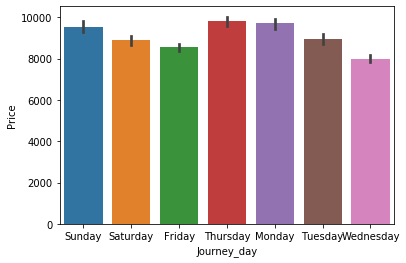

In [23]:
#now lets check the day of the journey relation with the output price column
sns.barplot('Journey_day','Price',data=df_train)

In [24]:
#we are converting the flights date to find which month it is and storing it in the month column
df_train["Jorney_month"]=df_train['Date_of_Journey'].map(lambda x:x.month_name())

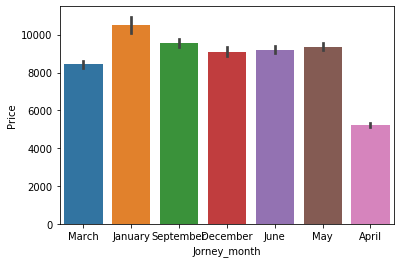

In [25]:
#now lets check the month of journey relation with the output price column
sns.barplot('Jorney_month','Price',data=df_train)

In [26]:
df_train.drop(['Date_of_Journey'],axis=1,inplace=True)

Text(0, 0.5, 'Count of flights')

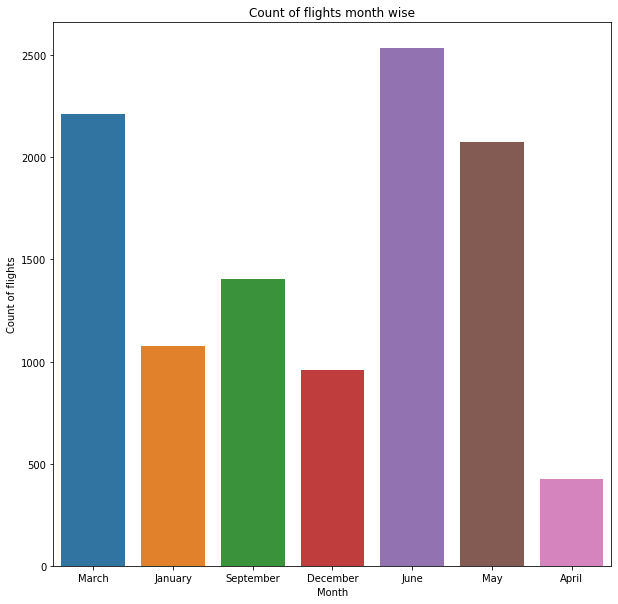

In [27]:
plt.figure(figsize = (10 , 10))
plt.title('Count of flights month wise')
sns.countplot(x = 'Jorney_month', data = df_train)
plt.xlabel('Month')
plt.ylabel('Count of flights')

#### There are around 2500 flights scheduled in the month of may-June, so  this time can be the peak month for the airlines as compared to april which seems like slack season for airlines

In [28]:
#Extracting Hours & minutes from Dep_time column
#as both Hours & minutes are required and to make the values understandable for model,we will simplify this

df_train['Dep_hour']=pd.to_datetime(df_train.Dep_Time).dt.hour
df_train['Dept_min']=pd.to_datetime(df_train.Dep_Time).dt.minute
df_train.drop(['Dep_Time'],axis=1,inplace=True)
df_train.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Jorney_month,Dep_hour,Dept_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,Sunday,March,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,Saturday,January,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,Friday,September,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,Thursday,December,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,Thursday,January,16,50


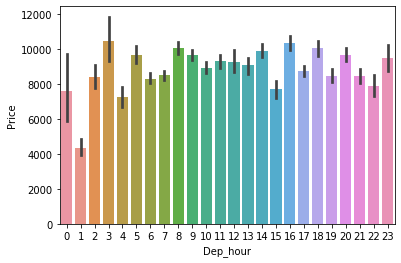

In [29]:
#now lets check the departure time relation with the output price column
sns.barplot('Dep_hour','Price',data=df_train)

In [30]:
#Extracting Hours & minutes from Arrival_time column
#as both Hours & minutes are required and to make the values understandable for model,we will simplify this

df_train['Arrival_hour']=pd.to_datetime(df_train.Arrival_Time).dt.hour
df_train['Arrival_min']=pd.to_datetime(df_train.Arrival_Time).dt.minute
df_train.drop(['Arrival_Time'],axis=1,inplace=True)
df_train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Jorney_month,Dep_hour,Dept_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,Sunday,March,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,Saturday,January,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,Friday,September,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,Thursday,December,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,Thursday,January,16,50,21,35


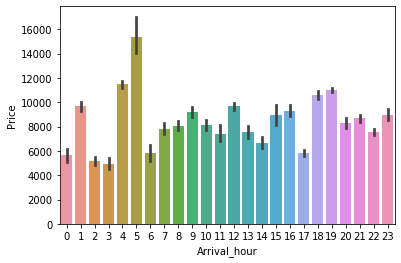

In [31]:
#now lets check the Arrival time relation with the output price column
sns.barplot('Arrival_hour','Price',data=df_train)

In [32]:
#As we can see that there are two 'no_info' columns we combine them
df_train['Additional_Info']=df_train['Additional_Info'].str.replace('No info','No Info')

In [33]:
#For the duration column which is in a hour and min format lets convert it into minutes using a equation 
df_train['Duration']=df_train['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)
#now lets convert this column into a numeric
df_train['Duration']=pd.to_numeric(df_train['Duration'])

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500., 3000., 3500.]),
 <a list of 9 Text xticklabel objects>)

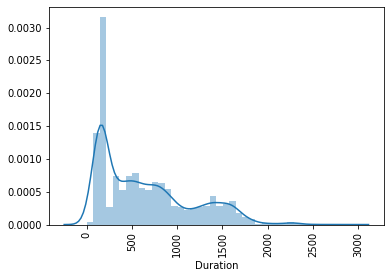

In [34]:
#Now lets check this Duration column in a histogram
plot=plt.figure()
sns.distplot(df_train['Duration'],bins=40)
plt.xticks(rotation=90)

In [35]:
# Drop Route variable as it's irrelevant
df_train.drop('Route',axis=1,inplace=True)

In [36]:
df_train.shape

(10682, 13)

In [37]:
df_train.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Journey_day,Jorney_month,Dep_hour,Dept_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,170,non-stop,No Info,3897,Sunday,March,22,20,1,10
1,Air India,Kolkata,Banglore,445,2 stops,No Info,7662,Saturday,January,5,50,13,15
2,Jet Airways,Delhi,Cochin,1140,2 stops,No Info,13882,Friday,September,9,25,4,25
3,IndiGo,Kolkata,Banglore,325,1 stop,No Info,6218,Thursday,December,18,5,23,30
4,IndiGo,Banglore,New Delhi,285,1 stop,No Info,13302,Thursday,January,16,50,21,35


# Numeric variables

In [38]:
#seperate numeric & categorical data
numeric=[feature for feature in df_train.columns if df_train[feature].dtypes!='O']
print("No of numerical feature:",len(numeric)) 
numeric

No of numerical feature: 6


['Duration', 'Price', 'Dep_hour', 'Dept_min', 'Arrival_hour', 'Arrival_min']

In [39]:
df_train.describe()

,Duration,Price,Dep_hour,Dept_min,Arrival_hour,Arrival_min
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,643.020502,9087.214567,12.491013,24.409287,13.349186,24.690601
std,507.830133,4611.548810,5.748820,18.767801,6.859317,16.506808
min,5.000000,1759.000000,0.000000,0.000000,0.000000,0.000000
25%,170.000000,5277.000000,8.000000,5.000000,8.000000,10.000000
50%,520.000000,8372.000000,11.000000,25.000000,14.000000,25.000000
75%,930.000000,12373.000000,18.000000,40.000000,19.000000,35.000000
max,2860.000000,79512.000000,23.000000,55.000000,23.000000,55.000000


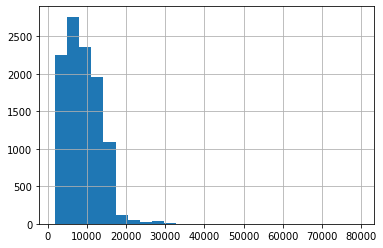

In [40]:
df_train['Price'].hist(bins=25)

In [41]:
categorical=[feature for feature in df_train.columns if df_train[feature].dtypes=='O']
categorical

['Airline',
 'Source',
 'Destination',
 'Total_Stops',
 'Additional_Info',
 'Journey_day',
 'Jorney_month']

# Relationship between categorical variable & Target variable

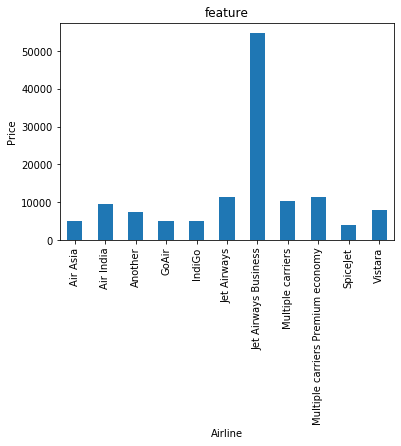

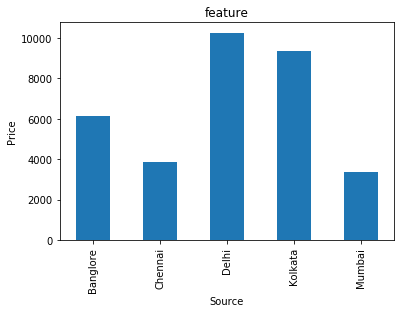

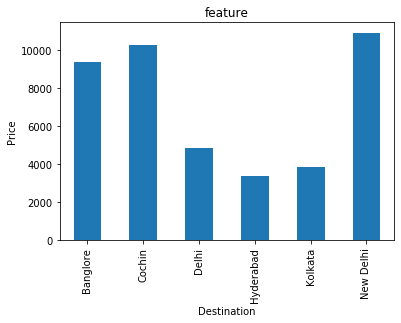

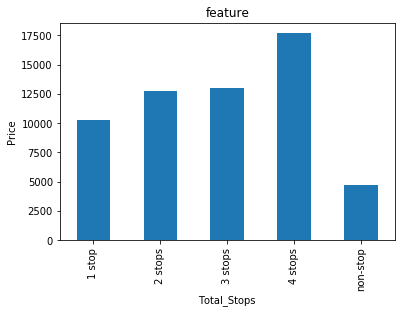

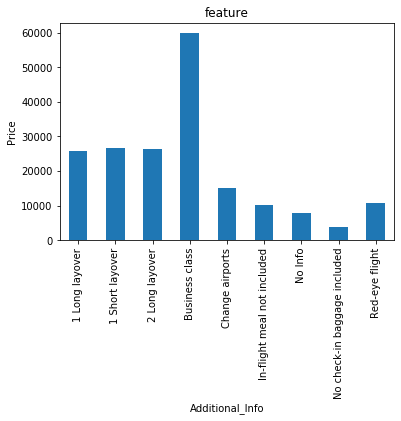

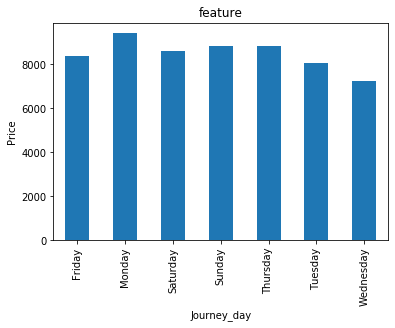

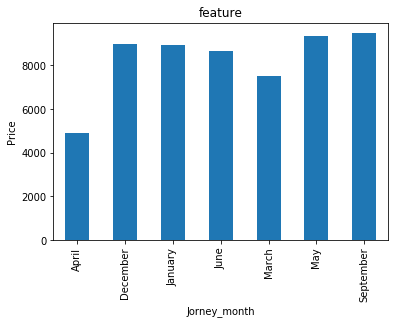

In [38]:
for feature in categorical:
    data=df_train.copy()
    data.groupby(feature)['Price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("Price")
    plt.title("feature")
    plt.show()

## Interpretation
### * From this we can see that Jet Airways Business flight has the highest fare.
### * Delhi has the highest flight fares
### * Flights that has more no. of stops has highest price

# Convert categorical features into numeric

In [42]:
df_train['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Another                                 4
Name: Airline, dtype: int64

In [43]:
#As Airline is a nominal categorical feature,will perform OnehotEncoding .
Airline=df_train[['Airline']]
Airline=pd.get_dummies(Airline,drop_first=True)
Airline.head()

,Airline_Air India,Airline_Another,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara
0,0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0


In [44]:
df_train['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [45]:
#Source is a nominal categorical feature,will perform OnehotEncoding .
Source=df_train[['Source']]
Source=pd.get_dummies(Source,drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [46]:
df_train['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [47]:
#Destination is a nominal categorical feature,will perform OnehotEncoding .
Destination=df_train[['Destination']]
Destination=pd.get_dummies(Destination,drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [48]:
df_train['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [49]:
df_train['Additional_Info'].value_counts()

No Info                         8347
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
Red-eye flight                     1
2 Long layover                     1
1 Short layover                    1
Name: Additional_Info, dtype: int64

In [50]:
#Now lets encode the inputs using label encoder
from sklearn.preprocessing import LabelEncoder
var_mod = ['Additional_Info','Journey_day','Jorney_month','Total_Stops']
le = LabelEncoder()
for i in var_mod:
    df_train[i] = le.fit_transform(df_train[i])

In [51]:
df_train.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Journey_day,Jorney_month,Dep_hour,Dept_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,170,4,6,3897,3,4,22,20,1,10
1,Air India,Kolkata,Banglore,445,1,6,7662,2,2,5,50,13,15
2,Jet Airways,Delhi,Cochin,1140,1,6,13882,0,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,325,0,6,6218,4,1,18,5,23,30
4,IndiGo,Banglore,New Delhi,285,0,6,13302,4,2,16,50,21,35


In [52]:
#Concatenate df_train+ Source,Airline,Destination

df_train=pd.concat([df_train,Airline,Source,Destination],axis=1)
df_train.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Journey_day,Jorney_month,Dep_hour,Dept_min,Arrival_hour,Arrival_min,Airline_Air India,Airline_Another,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,170,4,6,3897,3,4,22,20,1,10,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,445,1,6,7662,2,2,5,50,13,15,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,1140,1,6,13882,0,6,9,25,4,25,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,325,0,6,6218,4,1,18,5,23,30,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,285,0,6,13302,4,2,16,50,21,35,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [53]:
#Drop Airline,Source,Destination as we have already converted them with one Hot Encoding
df_train.drop(['Airline','Source','Destination'],axis=1,inplace=True)
df_train.head()

,Duration,Total_Stops,Additional_Info,Price,Journey_day,Jorney_month,Dep_hour,Dept_min,Arrival_hour,Arrival_min,Airline_Air India,Airline_Another,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,170,4,6,3897,3,4,22,20,1,10,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,445,1,6,7662,2,2,5,50,13,15,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1140,1,6,13882,0,6,9,25,4,25,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,325,0,6,6218,4,1,18,5,23,30,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,285,0,6,13302,4,2,16,50,21,35,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [54]:
df_train.shape

(10682, 29)

In [55]:
df_train.corr()

,Duration,Total_Stops,Additional_Info,Price,Journey_day,Jorney_month,Dep_hour,Dept_min,Arrival_hour,Arrival_min,Airline_Air India,Airline_Another,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
Duration,1.000000,-0.602282,-0.217010,0.506480,-0.020982,0.095255,0.002088,-0.019099,0.051531,-0.069663,0.261553,-0.018267,-0.092147,-0.343503,0.305519,-0.011968,-0.012063,-0.002508,-0.263434,-0.019033,-0.190651,0.295776,0.124437,-0.234809,0.295776,-0.340182,-0.234809,-0.190651,0.006732
Total_Stops,-0.602282,1.000000,0.242029,-0.571221,0.018813,-0.126132,0.039224,0.048901,-0.095650,0.175980,-0.007335,0.016521,0.033030,0.261658,-0.262310,-0.014764,-0.276971,-0.028182,0.289853,0.089530,0.270634,-0.482296,-0.113010,0.315130,-0.482296,0.515760,0.315130,0.270634,-0.021872
Additional_Info,-0.217010,0.242029,1.000000,-0.191643,0.015450,-0.008735,-0.043020,0.001673,-0.019455,0.028698,0.117560,0.006415,0.045079,0.161670,-0.499627,-0.061740,0.061908,0.011570,0.311797,0.071816,0.123020,-0.048124,-0.013967,0.053444,-0.048124,0.055134,0.053444,0.123020,-0.084511
Price,0.506480,-0.571221,-0.191643,1.000000,-0.026577,0.062521,0.006799,-0.024458,0.024244,-0.086155,0.050432,-0.005584,-0.095151,-0.361070,0.416124,0.253303,0.139793,0.017650,-0.296565,-0.060654,-0.179223,0.270676,0.009358,-0.230755,0.270676,-0.313417,-0.230755,-0.179223,0.189777
Journey_day,-0.020982,0.018813,0.015450,-0.026577,1.000000,0.104855,-0.005473,-0.004328,-0.006389,0.003479,-0.001634,0.002388,-0.001149,0.029139,-0.044403,0.003888,0.028484,0.017063,0.006463,-0.013318,0.005963,0.038927,-0.040494,-0.032636,0.038927,0.023877,-0.032636,0.005963,-0.007264
Jorney_month,0.095255,-0.126132,-0.008735,0.062521,0.104855,1.000000,-0.007567,-0.032618,-0.007958,-0.034856,0.010855,-0.007050,-0.024923,-0.033795,0.015518,-0.015938,0.074410,0.008789,-0.033543,-0.025699,0.007689,0.130793,-0.015423,-0.017776,0.130793,-0.151534,-0.017776,0.007689,-0.020859
Dep_hour,0.002088,0.039224,-0.043020,0.006799,-0.005473,-0.007567,1.000000,-0.024745,0.005180,0.067911,-0.012879,-0.002495,-0.016373,-0.023395,0.113942,-0.007524,-0.149992,-0.028672,-0.010451,0.023906,-0.014846,-0.118780,0.155471,-0.017292,-0.118780,0.009469,-0.017292,-0.014846,-0.022138
Dept_min,-0.019099,0.048901,0.001673,-0.024458,-0.004328,-0.032618,-0.024745,1.000000,0.043122,-0.017597,-0.045688,-0.014861,0.076751,-0.014714,0.024455,0.009168,-0.109370,-0.004624,0.092634,-0.077903,0.067110,-0.085534,-0.024238,0.037705,-0.085534,0.003200,0.037705,0.067110,0.107129
Arrival_hour,0.051531,-0.095650,-0.019455,0.024244,-0.006389,-0.007958,0.005180,0.043122,1.000000,-0.154363,0.088872,0.002542,0.018526,-0.071491,-0.027377,-0.014456,0.067930,0.013491,-0.090058,0.068834,-0.014795,-0.006790,0.054693,-0.033512,-0.006790,-0.030867,-0.033512,-0.014795,0.000366
Arrival_min,-0.069663,0.175980,0.028698,-0.086155,0.003479,-0.034856,0.067911,-0.017597,-0.154363,1.000000,0.061231,-0.001103,0.096839,0.035124,-0.057698,0.005232,-0.167455,-0.001786,0.012543,0.069422,-0.030493,-0.209882,0.118573,0.081196,-0.209882,0.095250,0.081196,-0.030493,0.021271


In [56]:
df_train.to_csv('cleaned_data.csv', index = None)

In [3]:
df_train =pd.read_csv('cleaned_data.csv')

In [4]:
df_train.head()

,Duration,Total_Stops,Additional_Info,Price,Journey_day,Jorney_month,Dep_hour,Dept_min,Arrival_hour,Arrival_min,...,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,170,4,6,3897,3,4,22,20,1,10,...,0,0,0,0,0,0,0,0,0,1
1,445,1,6,7662,2,2,5,50,13,15,...,0,0,0,1,0,0,0,0,0,0
2,1140,1,6,13882,0,6,9,25,4,25,...,0,0,1,0,0,1,0,0,0,0
3,325,0,6,6218,4,1,18,5,23,30,...,0,0,0,1,0,0,0,0,0,0
4,285,0,6,13302,4,2,16,50,21,35,...,0,0,0,0,0,0,0,0,0,1


# Assigning Input and output variables

In [5]:
x=df_train.drop('Price',axis=1)#taking all the other columns except price 
y=df_train['Price']

# Train Test Split

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
#We are splitting the data in to two parts one is used to train the model and another is used to evaluate the model
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

# Building a model
** Importing the required regressions

In [8]:
from sklearn.ensemble import RandomForestRegressor

In [9]:
# Defining the RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=100)

In [10]:
# Training the model
rfr.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

Text(0.5, 0, 'Relative Importance')

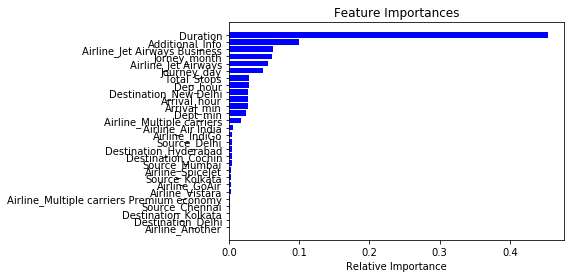

In [11]:
# In random forest we have a method to determine the feature importance in accordance with the relevance of the data
# lets check that once
features=x.columns
importances = rfr.feature_importances_
indices = np.argsort(importances)
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [62]:
# Now we can predict the data

In [12]:
predictions=rfr.predict(x_test)

In [13]:
predictions

array([ 3941.        , 11982.        ,  9893.70666667, ...,
        3914.48      ,  8052.65      ,  6938.75166667])

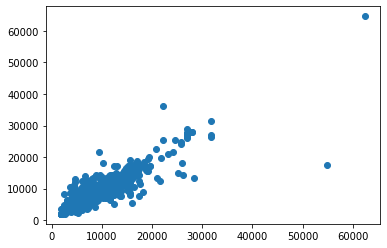

In [14]:
plt.scatter(y_test,predictions)

(array([-10000.,      0.,  10000.,  20000.,  30000.,  40000.,  50000.,
         60000.,  70000.,  80000.]), <a list of 10 Text xticklabel objects>)

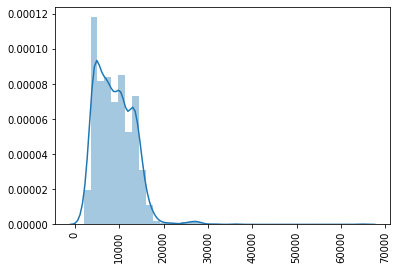

In [15]:
plot=plt.figure()
sns.distplot(predictions,bins=40)
plt.xticks(rotation=90)

# Regression Evaluation Metrics

In [16]:
from sklearn import metrics

In [17]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('r2_score:', (metrics.r2_score(y_test, predictions)))

MAE: 862.0253303551593
MSE: 3113478.152642699
RMSE: 1764.5050729999898
r2_score: 0.8566798736872852


# Residual Histogram

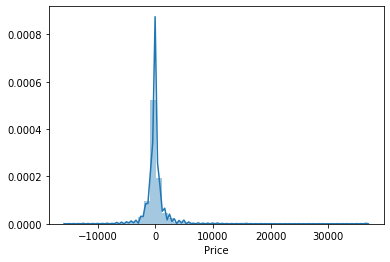

In [70]:
sns.distplot((y_test-predictions),bins=50)

In [69]:
# Applying Different regressions to check the r2_score to see which one is appropriate

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [74]:
from sklearn.metrics import r2_score,make_scorer
from sklearn.model_selection import cross_val_score

In [75]:
regg=[LinearRegression(),RandomForestRegressor(),SVR(),DecisionTreeRegressor()]

In [76]:
mean=[]
std=[]
for i in regg:
    cvs=cross_val_score(i,x,y,cv=5,scoring=make_scorer(r2_score))
    mean.append(np.mean(cvs))
    std.append(np.std(cvs))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

In [77]:
for i in range(4):
    print(regg[i].__class__.__name__,':',mean[i])

LinearRegression : 0.5817788940275277
RandomForestRegressor : 0.8251223947706855
SVR : -0.020860192463039873
DecisionTreeRegressor : 0.7512129797676559


In [77]:
#From this we can infer that Random Forest regressor is giving the highest R2_score 
#so lets test our data with Random Forest regressor

## Ridge Regression

In [81]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [82]:
params ={'alpha' :[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
ridge_regressor =GridSearchCV(Ridge(), params ,cv =5,scoring = 'neg_mean_absolute_error', n_jobs =-1)
ridge_regressor.fit(x_train ,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=0)

In [83]:
print(ridge_regressor.best_estimator_)
ridge_regressor.best_params_

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)


{'alpha': 0.1}

In [85]:
y_train_pred =ridge_regressor.predict(x_train) ##Predict train result
y_test_pred =ridge_regressor.predict(x_test) ##Predict test result

In [89]:
print("Train Results for Ridge Regressor Model:")
print(50 * '-')
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

Train Results for Ridge Regressor Model:
--------------------------------------------------
RMSE: 2969.897657916597
R-squared:  0.5829368489235375


### Lasso Regressor

In [90]:
params ={'alpha' :[0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
lasso_regressor =GridSearchCV(Lasso(), params ,cv =15,scoring = 'neg_mean_absolute_error', n_jobs =-1)
lasso_regressor.fit(x_train ,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37455155.28817749, tolerance: 18071458.91147111
  positive)


GridSearchCV(cv=15, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000, 100000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=0)

In [91]:
print(lasso_regressor.best_estimator_)
lasso_regressor.best_params_

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)


{'alpha': 0.0001}

In [93]:
y_train_pred =lasso_regressor.predict(x_train) ##Predict train result
y_test_pred =lasso_regressor.predict(x_test) ##Predict test result

In [95]:
print("Train Results for Lasso Regressor Model:")
print(50 * '-')
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

Train Results for Lasso Regressor Model:
--------------------------------------------------
RMSE: 2969.7946673889346
R-squared:  0.5829657743709237


# Now we will perform above steps in Test data.We are not combining train and test data because of data leakage due to which our test data will know some of the results which is not good for the project.

# Test Data

In [41]:
df_test=pd.read_excel("flight_test.xlsx")
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [42]:
df_test.shape

(2671, 10)

In [43]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
Airline            2671 non-null object
Date_of_Journey    2671 non-null object
Source             2671 non-null object
Destination        2671 non-null object
Route              2671 non-null object
Dep_Time           2671 non-null object
Arrival_Time       2671 non-null object
Duration           2671 non-null object
Total_Stops        2671 non-null object
Additional_Info    2671 non-null object
dtypes: object(10)
memory usage: 208.8+ KB


In [44]:
df_test['Airline'].value_counts()

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Jet Airways Business                   2
Vistara Premium economy                2
Name: Airline, dtype: int64

# Feature Engineering

In [45]:
df_test['Journey_day']=pd.to_datetime(df_test.Date_of_Journey,format='%d/%m/%Y').dt.day
df_test['Journey_month']=pd.to_datetime(df_test.Date_of_Journey,format='%d/%m/%Y').dt.month
df_test.drop('Date_of_Journey',axis=1,inplace=True)

In [46]:
df_test['Dep_Hour']=pd.to_datetime(df_test['Dep_Time']).dt.hour
df_test['Dep_Minute']=pd.to_datetime(df_test['Dep_Time']).dt.minute
df_test.drop('Dep_Time',axis=1,inplace=True)

In [47]:
df_test['Arrival_Hour']=pd.to_datetime(df_test['Arrival_Time']).dt.hour
df_test['Arrival_Minute']=pd.to_datetime(df_test['Arrival_Time']).dt.minute
df_test.drop('Arrival_Time',axis=1,inplace=True)

In [48]:
#For the duration column which is in a hour and min format lets convert it into minutes using a equation 
df_test['Duration']=df_test['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)
#now lets convert this column into a numeric
df_test['Duration']=pd.to_numeric(df_test['Duration'])

In [49]:
df_test['Additional_Info'].value_counts()

No info                         2148
In-flight meal not included      444
No check-in baggage included      76
Change airports                    1
1 Long layover                     1
Business class                     1
Name: Additional_Info, dtype: int64

In [50]:
# Drop Route variable as it's irrelevant
df_test.drop('Route',axis=1,inplace=True)

In [51]:
df_test.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute
0,Jet Airways,Delhi,Cochin,655,1 stop,No info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,240,1 stop,No info,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,1425,1 stop,In-flight meal not included,21,5,19,15,19,0
3,Multiple carriers,Delhi,Cochin,780,1 stop,No info,21,5,8,0,21,0
4,Air Asia,Banglore,Delhi,170,non-stop,No info,24,6,23,55,2,45


In [52]:
categorical_test=[feature for feature in df_test.columns if df_test[feature].dtypes=='O']
categorical_test

['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info']

In [53]:
#Convert categorical variable into numeric

Airline=df_test[['Airline']]
Airline=pd.get_dummies(Airline,drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [54]:
Source=df_test[['Source']]
Source=pd.get_dummies(Source,drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,0


In [55]:
Destination=df_test[['Destination']]
Destination=pd.get_dummies(Destination,drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0


In [56]:
df_test['Total_Stops'].value_counts()

1 stop      1431
non-stop     849
2 stops      379
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64

In [57]:
from sklearn.preprocessing import LabelEncoder
var_test=['Total_Stops','Additional_Info']
le=LabelEncoder()
for i in var_test:
    df_test[i]=le.fit_transform(df_test[i])

In [58]:
#Concatenate df_test+Airline,Source,Destination
df_test=pd.concat([df_test,Airline,Source,Destination],axis=1)
df_test.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_Hour,Dep_Minute,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,Jet Airways,Delhi,Cochin,655,0,5,6,6,17,30,...,0,0,1,0,0,1,0,0,0,0
1,IndiGo,Kolkata,Banglore,240,0,5,12,5,6,20,...,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,1425,0,3,21,5,19,15,...,0,0,1,0,0,1,0,0,0,0
3,Multiple carriers,Delhi,Cochin,780,0,5,21,5,8,0,...,0,0,1,0,0,1,0,0,0,0
4,Air Asia,Banglore,Delhi,170,4,5,24,6,23,55,...,0,0,0,0,0,0,1,0,0,0


In [59]:
#now drop the strings Airline,Source,Destination from df_test
df_test.drop(['Airline','Source','Destination'],axis=1,inplace=True)
df_test.head()

,Duration,Total_Stops,Additional_Info,Journey_day,Journey_month,Dep_Hour,Dep_Minute,Arrival_Hour,Arrival_Minute,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,655,0,5,6,6,17,30,4,25,0,...,0,0,1,0,0,1,0,0,0,0
1,240,0,5,12,5,6,20,10,20,0,...,0,0,0,1,0,0,0,0,0,0
2,1425,0,3,21,5,19,15,19,0,0,...,0,0,1,0,0,1,0,0,0,0
3,780,0,5,21,5,8,0,21,0,0,...,0,0,1,0,0,1,0,0,0,0
4,170,4,5,24,6,23,55,2,45,0,...,0,0,0,0,0,0,1,0,0,0


In [60]:
df_test.shape

(2671, 28)

# Applying the regressions on a new test data file

In [61]:
test_price_predictions=rfr.predict(df_test)

### Predicted Price

In [62]:
test_price_predictions

array([ 7007.27      ,  9830.94      ,  8769.23      , ...,
        7176.12833333,  8735.115     , 52935.87      ])

(array([-10000.,      0.,  10000.,  20000.,  30000.,  40000.,  50000.,
         60000.,  70000.]), <a list of 9 Text xticklabel objects>)

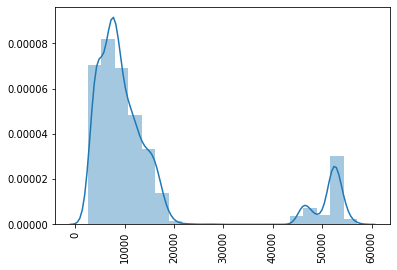

In [63]:
plot=plt.figure()
sns.distplot(test_price_predictions,bins=20)
plt.xticks(rotation=90)